<a href="https://colab.research.google.com/github/daudibrahimhasan/PokemonDataScience/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, average_precision_score
import warnings
warnings.filterwarnings('ignore')

# Load ML dataset
df = pd.read_csv('/content/drive/MyDrive/PokemonDataScience/data/forML/pokemon_ml.csv')
print(f"Loaded ML dataset: {df.shape}")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded ML dataset: (1179, 44)


,DexNumber,Generation,Hp,Attack,Defense,SpecialAttack,SpecialDefense,Speed,TotalStats,Weight,...,DamageFromSteel,DamageFromFire,DamageFromWater,DamageFromGrass,DamageFromElectric,DamageFromPsychic,DamageFromIce,DamageFromDragon,DamageFromDark,DamageFromFairy
0,494,0.0,100,100,100,100,100,100,600,4.0,...,0.5,0.5,2.0,0.50,1.0,0.5,0.5,1.0,2.0,0.5
1,1,0.0,45,49,49,65,65,45,318,6.9,...,1.0,2.0,0.5,0.25,0.5,2.0,2.0,1.0,1.0,0.5
2,2,0.0,60,62,63,80,80,60,405,13.0,...,1.0,2.0,0.5,0.25,0.5,2.0,2.0,1.0,1.0,0.5
3,3,0.0,80,82,83,100,100,80,625,100.0,...,1.0,2.0,0.5,0.25,0.5,2.0,2.0,1.0,1.0,0.5
4,4,0.0,39,52,43,60,50,65,309,8.5,...,0.5,0.5,2.0,0.50,1.0,1.0,0.5,1.0,1.0,0.5


In [9]:
print(df.shape)
print(df.head())


(1179, 44)
   DexNumber  Generation   Hp  Attack  Defense  SpecialAttack  SpecialDefense  \
0        494         0.0  100     100      100            100             100   
1          1         0.0   45      49       49             65              65   
2          2         0.0   60      62       63             80              80   
3          3         0.0   80      82       83            100             100   
4          4         0.0   39      52       43             60              50   

   Speed  TotalStats  Weight  ...  DamageFromSteel  DamageFromFire  \
0    100         600     4.0  ...              0.5             0.5   
1     45         318     6.9  ...              1.0             2.0   
2     60         405    13.0  ...              1.0             2.0   
3     80         625   100.0  ...              1.0             2.0   
4     65         309     8.5  ...              0.5             0.5   

   DamageFromWater  DamageFromGrass  DamageFromElectric  DamageFromPsychic  \
0  

In [4]:
# Define features and target
target = 'IsLegendary'
features = [col for col in df.columns if col not in ['DexNumber', 'IsLegendary', 'IsMythical', 'IsUltraBeast']]

X = df[features]
y = df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (943, 40), Test size: (236, 40)


**Model Training and Cross-Validation**

In [6]:
classifiers = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='matthews_corrcoef')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    mcc = matthews_corrcoef(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    results[name] = {'MCC': mcc, 'PR-AUC': pr_auc, 'CV-MCC': cv_scores.mean()}
    print(f"{name}: MCC={mcc:.3f}, PR-AUC={pr_auc:.3f}, CV-MCC={cv_scores.mean():.3f}")


DecisionTree: MCC=0.821, PR-AUC=0.714, CV-MCC=0.842
RandomForest: MCC=0.849, PR-AUC=0.953, CV-MCC=0.863
GradientBoosting: MCC=0.942, PR-AUC=0.983, CV-MCC=0.905
[LightGBM] [Info] Number of positive: 70, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2009
[LightGBM] [Info] Number of data points in the train set: 848, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082547 -> initscore=-2.408231
[LightGBM] [Info] Start training from score -2.408231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

**Ensemble Model**

In [8]:
class EnsembleClassifier:
    def __init__(self, classifiers, weights):
        self.classifiers = classifiers
        self.weights = weights
    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        return self
    def predict_proba(self, X):
        predictions = np.array([clf.predict_proba(X)[:, 1] for clf in self.classifiers])
        return np.average(predictions, axis=0, weights=self.weights)
    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

weights = [results[name]['CV-MCC'] for name in classifiers.keys()]
ensemble = EnsembleClassifier(list(classifiers.values()), weights)
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
y_pred_proba_ensemble = ensemble.predict_proba(X_test)
ensemble_mcc = matthews_corrcoef(y_test, y_pred_ensemble)
ensemble_pr_auc = average_precision_score(y_test, y_pred_proba_ensemble)
print(f"Ensemble: MCC={ensemble_mcc:.3f}, PR-AUC={ensemble_pr_auc:.3f}")


[LightGBM] [Info] Number of positive: 78, number of negative: 865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 943, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082715 -> initscore=-2.406021
[LightGBM] [Info] Start training from score -2.406021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

**Random Forest**

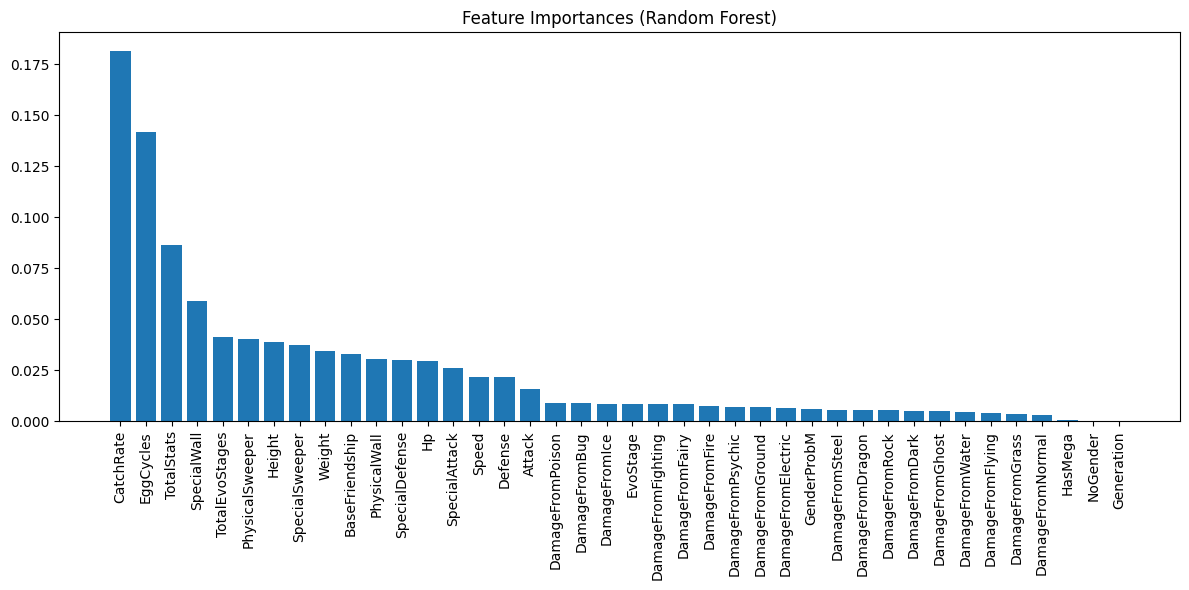

In [10]:
rf = classifiers['RandomForest']
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


**Clustering: Agglomerative + t-SNE Visualization**

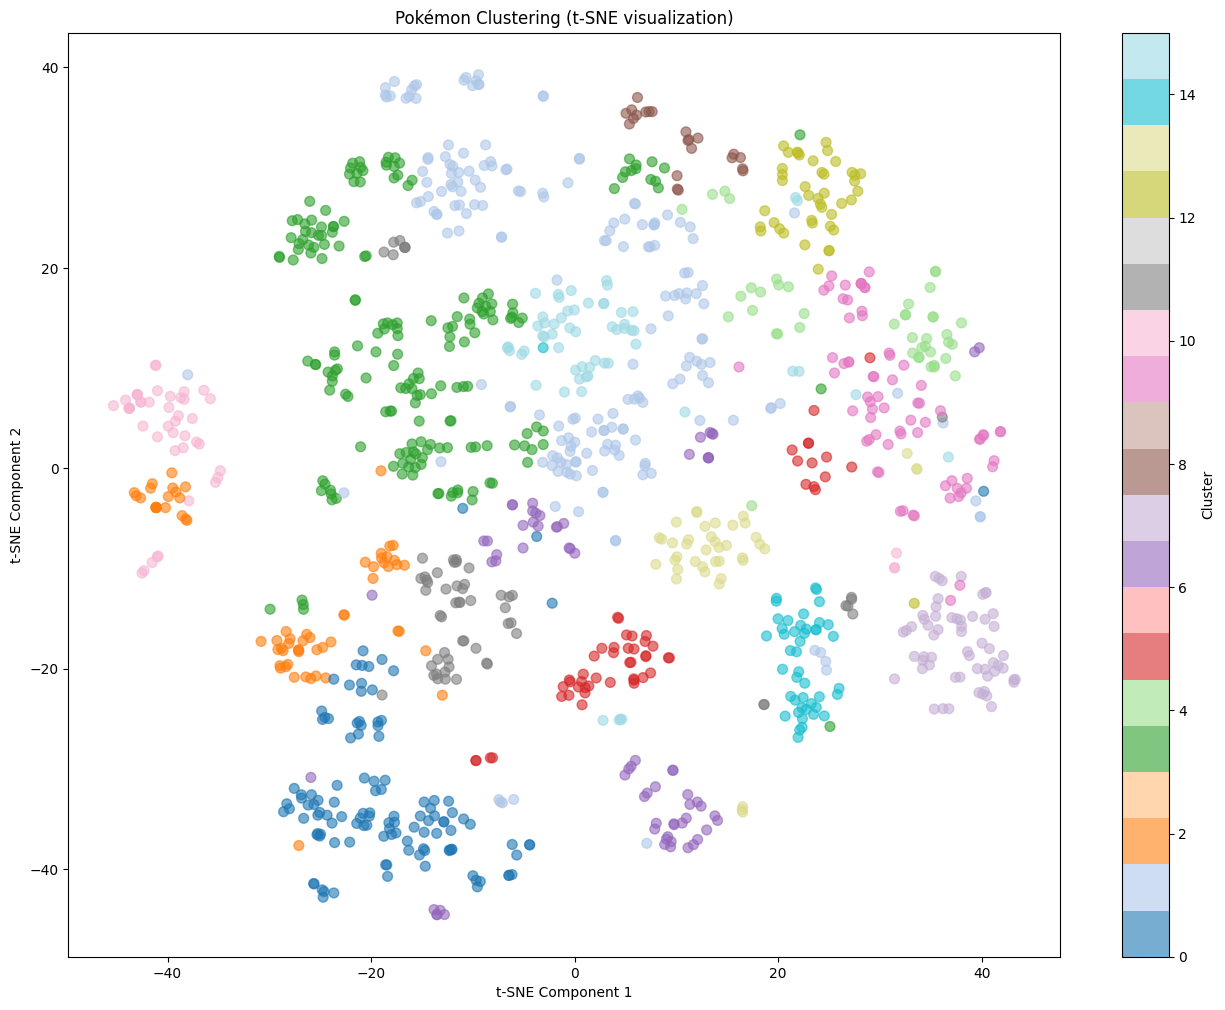

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X_scaled = StandardScaler().fit_transform(X)
n_clusters = 16
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = clustering.fit_predict(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(16, 12))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab20', alpha=0.6, s=50)
plt.title('Pokémon Clustering (t-SNE visualization)')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


**Classification Report and Confusion Matrix**

Classification Report (Ensemble):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       217
           1       1.00      0.89      0.94        19

    accuracy                           0.99       236
   macro avg       1.00      0.95      0.97       236
weighted avg       0.99      0.99      0.99       236



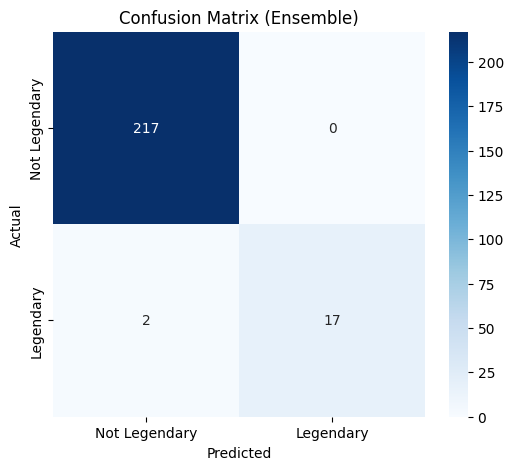

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Classification Report (Ensemble):")
print(classification_report(y_test, y_pred_ensemble))

cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Ensemble)')
plt.show()